Mounted at /content/gdrive


Libraries

In [4]:
import numpy as np
import pandas as pd
import cv2 as cv
from google.colab.patches import cv2_imshow # for image display
from skimage import io
from PIL import Image
import matplotlib.pylab as plt

In [7]:
from google.colab import files
from IPython.display import Image

Upload Image

In [9]:
uploaded = files.upload()

Saving Image_1.png to Image_1.png


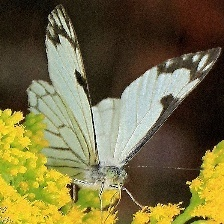

In [11]:
Image('Image_1.png')

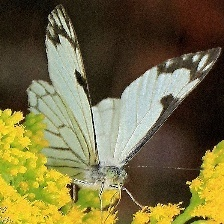

In [15]:
Image('Image_1.png', width=100)


In [21]:
import numpy as np
import pandas as pd
import cv2 as cv
from google.colab.patches import cv2_imshow # for image display
from skimage import io
from PIL import Image
import matplotlib.pylab as plt

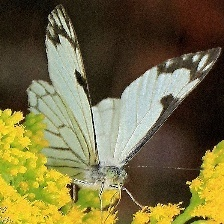

In [28]:
from IPython.display import Image, display

# Display the image
display(Image(filename='Image_1.png'))

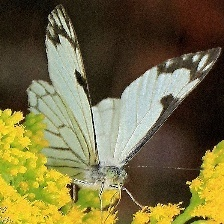

Datatype: uint8
Height: 224
Width: 224


In [29]:
import cv2
from IPython.display import Image, display

# Read the image
image = cv2.imread('Image_1.png')

# Check datatype
datatype = image.dtype

# Check height and width
height, width, _ = image.shape

# Display the image
display(Image(filename='Image_1.png'))

# Print information
print(f"Datatype: {datatype}")
print(f"Height: {height}")
print(f"Width: {width}")

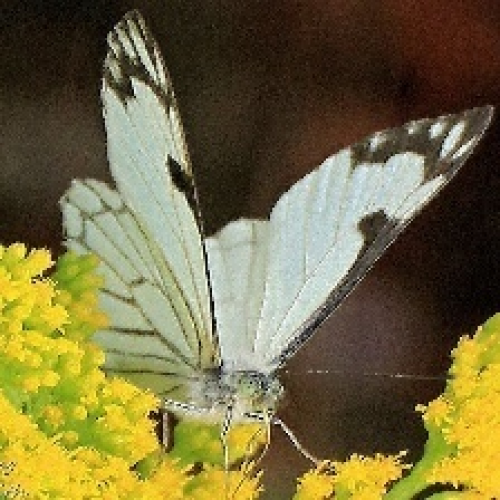

-1

In [30]:
# to prevent image does from skewed or distorted
# calculate the ratio of the new image to the old image
r = 500 / image.shape[1]
dim = (500, int(image.shape[0] * r))

# perform the actual resizing of the image and show it
resized = cv.resize(image, dim, interpolation = cv.INTER_AREA)
cv2_imshow(resized)
cv.waitKey(0)


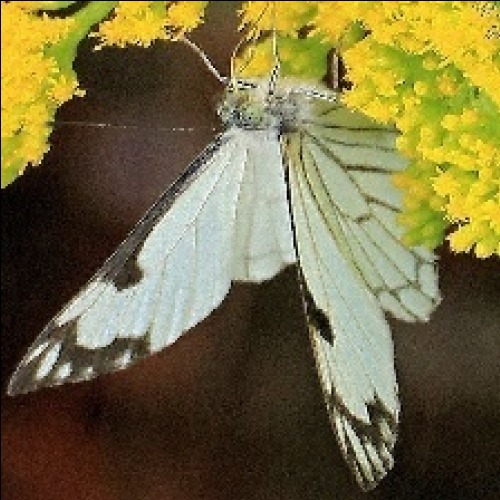

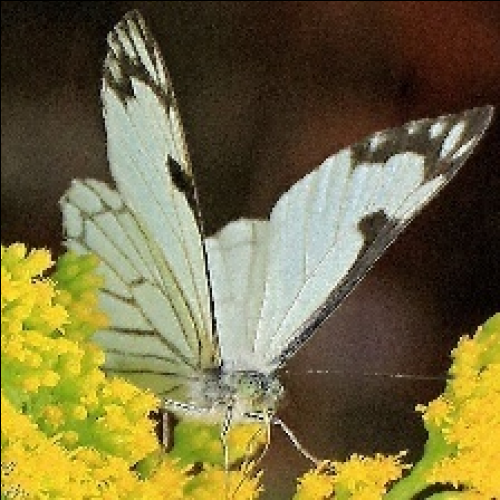

-1

In [31]:
# grab the dimensions of the image and calculate the center
(h, w) = resized.shape[:2]
center = (w / 2, h / 2)

# rotate the image by 180 degrees
M = cv.getRotationMatrix2D(center, 180, 1.0)
rotated = cv.warpAffine(resized, M, (w, h))
cv2_imshow(rotated)

# re-rotate
M = cv.getRotationMatrix2D(center, 180, 1.0)
rotated = cv.warpAffine(rotated, M, (w, h))
cv2_imshow(rotated)
cv.waitKey(0)

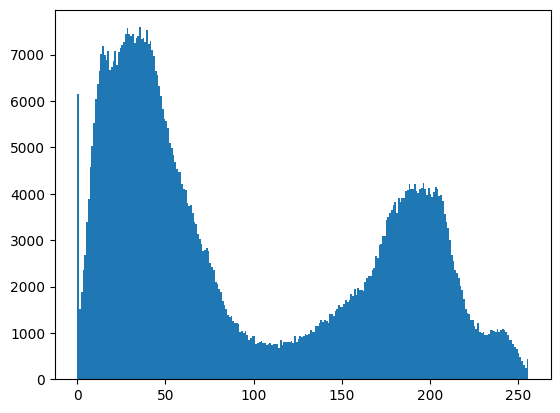

In [32]:
plt.hist(rotated.ravel(),bins = 256, range = [0,256])
plt.show()

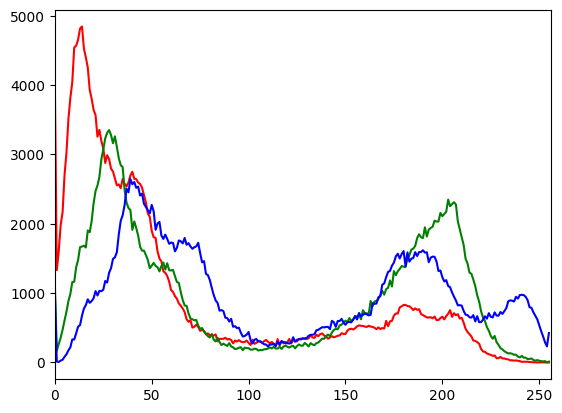

In [33]:
color = ('r','g','b')
for i,col in enumerate(color):
    histr = cv.calcHist([rotated],[i],None,[256],[0,256])
    plt.plot(histr,color = col)
    plt.xlim([0,256])
plt.show()

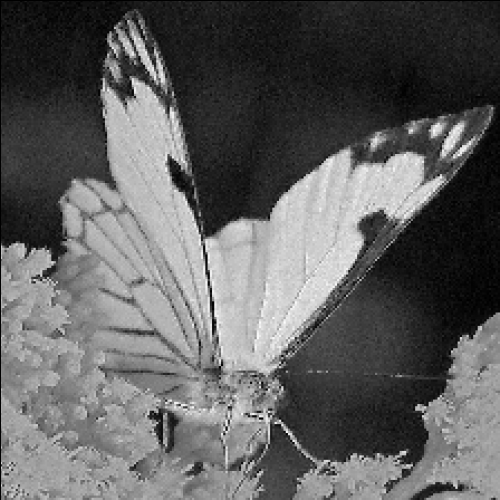

In [34]:
gray_image = cv.cvtColor(rotated, cv.COLOR_RGB2GRAY)
cv2_imshow(gray_image)

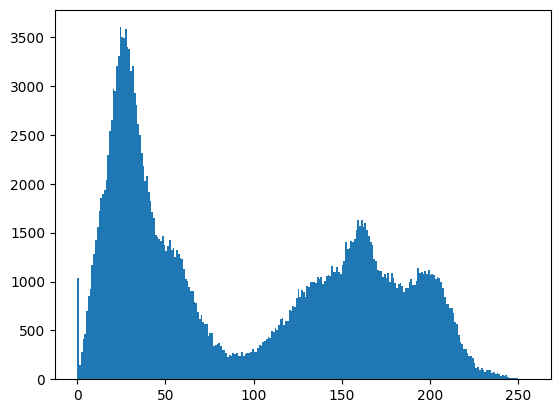

In [35]:
# Plot the histogram of the gray image. We could observe that the frequency of
# the image hist has decreased ~ 1/3 of the histogram of color image
plt.hist(gray_image.ravel(),bins = 256, range = [0, 256])
plt.show()


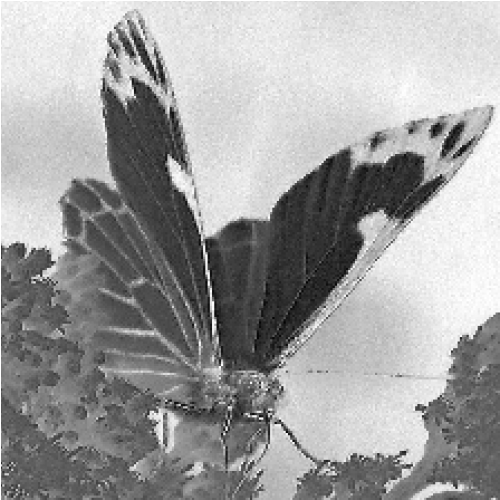

In [36]:
# This is an inverse operation of the grayscale image, you could see that the
# bright pixels become dark, and the dark pixels become bright
im2 = 255 - gray_image
cv2_imshow(im2)

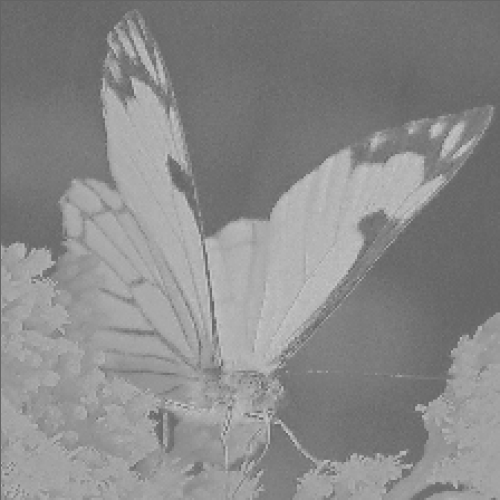

In [37]:
# Another transform of the image, after adding a constant,
# all the pixels become brighter and a hazing-like effect of the image is generated
im3 = (100/255)*gray_image + 100
cv2_imshow(im3)

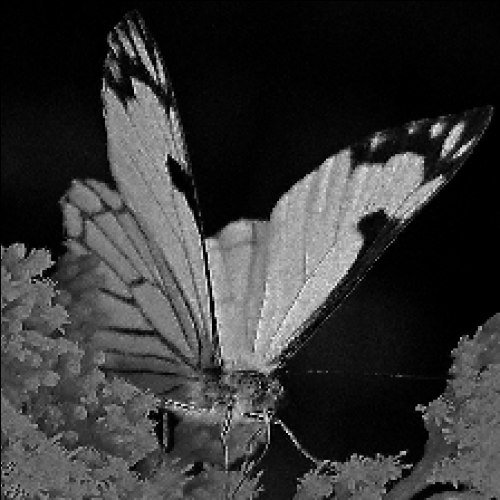

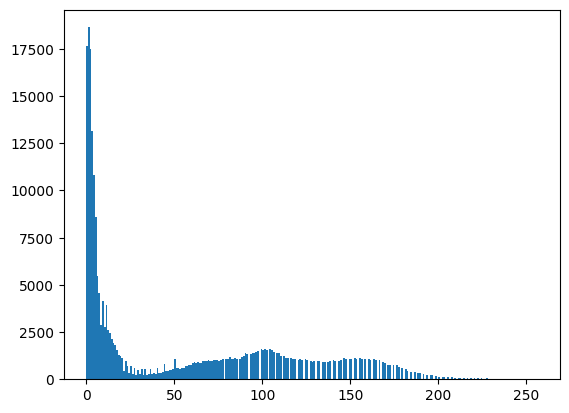

In [38]:
# The lightness level of the gray_image decreases after this step
im4 = 255*(gray_image/255)**2
cv2_imshow(im4)
plt.hist(im4.ravel(),bins = 256, range = [0, 256])
plt.show()

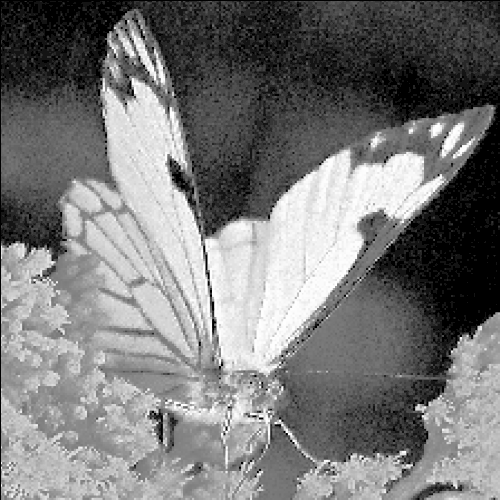

In [39]:
# function of histogram equalization
def histeq(im, nbr_bins = 256):
  """ Histogram equalization of a grayscale image.  """
  # get the image histogram
  imhist, bins = np.histogram(im.flatten(), nbr_bins, [0, 256])
  cdf = imhist.cumsum() # cumulative distribution function
  cdf = imhist.max()*cdf/cdf.max()  #normalize
  cdf_mask = np.ma.masked_equal(cdf, 0)
  cdf_mask = (cdf_mask - cdf_mask.min())*255/(cdf_mask.max()-cdf_mask.min())
  cdf = np.ma.filled(cdf_mask,0).astype('uint8')
  return cdf[im.astype('uint8')]

# apply the function on your dark image to increase the contrast
# we could observe that the contrast of the black background has increased
im5 = histeq(im4)
cv2_imshow(im5)


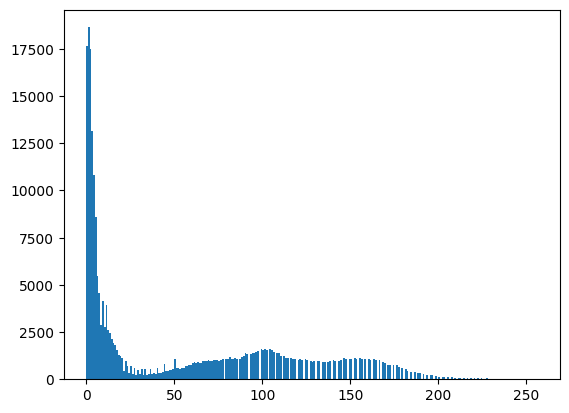

In [40]:
#Dark image 👉 gray levels would be clustered at the lower end

#Uniformly bright image 👉 gray levels would would be clustered at the upper end.

#Well contrasted image 👉 gray levels would be well spread out



# Extra: try to visualize the histogram of the image after histogram equalization
# Before histogram equalization
plt.hist(im4.ravel(),bins = 256, range = [0, 256])
plt.show()

In [41]:
# Python program to demonstrate erosion & dilation of images.
import cv2
from google.colab.patches import cv2_imshow
import numpy as np

# Reading the input image
import imageio
img = imageio.imread("https://placekitten.com/200/300")
# img = io.imread("https://placekitten.com/200/300")

# placekitten.com
# A quick and simple service for getting pictures of kittens for use
# as placeholders in your designs or code.
# Just put your image size (width & height)
# after our URL and you'll get a placeholder.

<ipython-input-41-327189062a6b>:8: DeprecationWarning: Starting with ImageIO v3 the behavior of this function will switch to that of iio.v3.imread. To keep the current behavior (and make this warning disappear) use `import imageio.v2 as imageio` or call `imageio.v2.imread` directly.
  img = imageio.imread("https://placekitten.com/200/300")


In [42]:
# to prevent image does from skewed or distorted
# calculate the ratio of the new image to the old image
r = 300 / img.shape[1]
dim = (300, int(img.shape[0] * r))

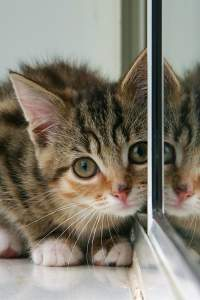

In [43]:
# Warning: Color image loaded by OpenCV is in BGR mode.
# But Matplotlib displays in RGB mode.
# So color images will not be displayed correctly in Matplotlib
# if image is read with OpenCV.
bgr2rgb = cv2.cvtColor(img, cv.COLOR_BGR2RGB)
cv2_imshow(bgr2rgb)

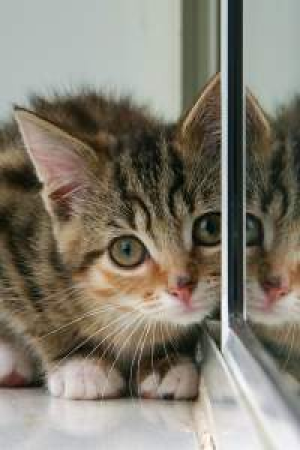

(450, 300, 3)


In [44]:
# perform the actual resizing of the image and show it
resized3 = cv.resize(bgr2rgb, dim, interpolation = cv.INTER_AREA)
cv2_imshow(resized3)
cv.waitKey(0)

print(resized3.shape)

Image_1.png


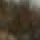

-1

In [47]:
# crop the image using array slices
cropped = resized3[100:140, 100:140]
print('Image_1.png')
cv2_imshow(cropped)
cv.waitKey(0)




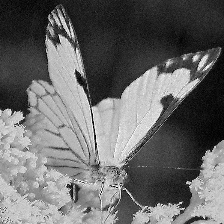

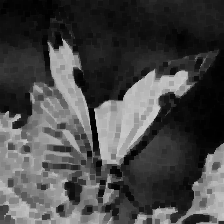

In [49]:
import cv2
import numpy as np
from google.colab.patches import cv2_imshow  # for displaying images in Colab

# Assuming you have loaded an image (replace 'your_image.jpg' with the actual image file)
image = cv2.imread('Image_1.png')

# Convert the image to grayscale
gray_image = cv2.cvtColor(image, cv2.COLOR_BGR2GRAY)

# Define the kernel for erosion
kernel = np.ones((5, 5), np.uint8)

# Perform erosion on the grayscale image
img_erosion = cv2.erode(gray_image, kernel, iterations=1)

# Display the original and eroded images
cv2_imshow(gray_image)
cv2_imshow(img_erosion)

In [6]:
import io
import requests
from google.colab import drive
drive.mount('/content/gdrive', force_remount=True)
